In [70]:
import igraph as ig
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('data/foodWebDataBase.csv', index_col=0)


/tmp/ipykernel_20110/1255689621.py:1: DtypeWarning: Columns (2,8,12,13,14,15,16,17,22,26,27,28,29,30,31,35,36,39,40,41,42,43,44,46,47,48,49) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/foodWebDataBase.csv', index_col=0)


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 222151 entries, 1 to 222151
Data columns (total 49 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   link.citation               222151 non-null  object 
 1   link.methodology            65980 non-null   object 
 2   interaction.type            220230 non-null  object 
 3   interaction.dimensionality  203794 non-null  object 
 4   interaction.classification  221196 non-null  object 
 5   con.taxonomy                222151 non-null  object 
 6   con.taxonomy.level          214109 non-null  object 
 7   con.common                  63016 non-null   object 
 8   con.lifestage               138613 non-null  object 
 9   con.metabolic.type          216677 non-null  object 
 10  con.movement.type           222099 non-null  object 
 11  con.size.citation           47025 non-null   object 
 12  con.size.method             39003 non-null   object 
 13  con.length.min.cm. 

In [73]:
df.describe()

,con.mass.mean.g.,con.mass.max.g.,res.mass.mean.g.,res.mass.max.g.
count,2.221510e+05,222151.000000,2.221510e+05,222151.000000
mean,1.192526e+04,-997.793576,3.139098e+02,-998.189502
std,4.295109e+05,65.242275,1.124244e+05,36.957645
min,-9.990000e+02,-999.000000,-9.990000e+02,-999.000000
25%,2.040570e-04,-999.000000,1.550000e-06,-999.000000
50%,3.593440e-03,-999.000000,2.202710e-04,-999.000000
75%,1.000000e-01,-999.000000,2.500000e-03,-999.000000
max,5.239535e+07,2568.732374,5.239535e+07,3500.000000


In [84]:
df_cleaned = df[['interaction.type','con.taxonomy', 'con.taxonomy.level', 'res.taxonomy', 'res.taxonomy.level', 'geographic.location', 'con.movement.type', 'res.movement.type']]

df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 222151 entries, 1 to 222151
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   interaction.type     220230 non-null  object
 1   con.taxonomy         222151 non-null  object
 2   con.taxonomy.level   214109 non-null  object
 3   res.taxonomy         222151 non-null  object
 4   res.taxonomy.level   192582 non-null  object
 5   geographic.location  222151 non-null  object
 6   con.movement.type    222099 non-null  object
 7   res.movement.type    217048 non-null  object
dtypes: object(8)
memory usage: 15.3+ MB


In [85]:
df_cleaned.describe()

,interaction.type,con.taxonomy,con.taxonomy.level,res.taxonomy,res.taxonomy.level,geographic.location,con.movement.type,res.movement.type
count,220230,222151,214109,222151,192582,222151,222099,217048
unique,10,3952,12,4687,58,65,20,21
top,predacious,2D,species,saphrophytes,species,Germany,walking,walking
freq,157384,5343,148618,1927,137376,93266,146638,112861


In [86]:
df_cleaned = df_cleaned[(df_cleaned['con.taxonomy.level'] == 'species') & (df_cleaned['res.taxonomy.level'] == 'species')].dropna()
pattern_to_remove = r'\s+\(juv\)$'

# 2. Apply the replacement to both source and target taxonomy columns
df_cleaned['con.taxonomy'] = df['con.taxonomy'].str.replace(pattern_to_remove, '', regex=True)
df_cleaned['res.taxonomy'] = df['res.taxonomy'].str.replace(pattern_to_remove, '', regex=True)
len(df)

222151

In [87]:
df_cleaned.describe()

,interaction.type,con.taxonomy,con.taxonomy.level,res.taxonomy,res.taxonomy.level,geographic.location,con.movement.type,res.movement.type
count,99602,99602,99602,99602,99602,99602,99602,99602
unique,6,1814,1,3359,1,25,5,8
top,predacious,Veigaia nemorensis,species,Veigaia nemorensis,species,Germany,walking,walking
freq,72871,1561,99602,1063,99602,29458,57104,44341


In [90]:
df_cleaned['res.movement.type'].unique()

array(['walking', 'flying', 'swimming', 'sessile', 'floating', 'other',
       'invertebrate', 'endotherm vertebrate'], dtype=object)

In [79]:
counts_df = df_cleaned['geographic.location'].value_counts().reset_index()
counts_df.columns = ['geographic.location', 'count'] # Optional: Rename columns for clarity
print(counts_df)

                                geographic.location  count
0                                           Germany  29458
1                                               USA  18256
2             Eastern Weddell Sea Shelf, Antarctica  15618
3                                    United Kingdom  11149
4                                          Portugal   4636
5                      Ireland/West Cork/Skibbereen   4508
6             Florida Key islands, Florida Bay, USA   2679
7                       Switzerland, Lake Neuchatel   2412
8   Puerto Rico-Virgin Islands (PRVI) shelf complex   1989
9      Tributaries of the Taieri River, New Zealand   1482
10                                      Brasil (CE)   1459
11                   Santa Barbara, California, USA   1141
12                        Arctic Shelf Area, Arctic   1065
13                                          Iceland    707
14                                           Canada    706
15                                       Mozambique    6

In [91]:
df_cleaned.sort_values('con.taxonomy')
df_cleaned.to_csv('data/foodWebCleaned.csv')

In [81]:
df_edges = df_cleaned.dropna(subset=['con.taxonomy', 'res.taxonomy'])
edges = list(zip(df_edges['con.taxonomy'], df_edges['res.taxonomy']))
g = ig.Graph.TupleList(edges, directed=True)

vlist = g.vs()
list_sorted = sorted(vlist, key=lambda v: v['name'])
for v in vlist:
    print(v.index, v['name'], len(v.incident()))

0 Emberiza schoeniclus 159
1 Stilicus rufipes 105
2 Trogophloeus corticinus 0
3 Aphtona lutescens 0
4 Pisaura mirabilis 94
5 Cloeon simile 0
6 Platystethus nodifrons 0
7 Anacaena limbata 0
8 Gabrius fermoralis 30
9 Marpissa radiata 45
10 Chaetocnema confusa 0
11 Lesteva sicula 69
12 Pelochares versicolor 0
13 Diplocampa assimile 6
14 Tetartopeus terminatum 30
15 Argiope bruennichi 36
16 Ilione lineata 0
17 Trypoxylon attenuatum 0
18 Pteronemobius heydenii 0
19 Propylaea quatuordecimpunctata 2
20 Ligidium hypnorum 0
21 Chartoscirta cincta 0
22 Dryops auriculatus 0
23 Limnia paludicola 0
24 Pachybrachius sp 0
25 Paederus riparius 118
26 Zora spinimana 78
27 Falco subbuteo 37
28 Conocephalus dorsalis 43
29 Pirata latitans 6
30 Pirata tenuitarsis 13
31 Tetanocera ferruginea 0
32 Cicadella viridis 0
33 Limnobaris dolorosa 0
34 Ilione albiseta 0
35 Pardosa prativaga 20
36 Tibellus maritimus 47
37 Coenagrion pulchellum 33
38 Somatochlora flavomaculata 62
39 Chrysotus cilipes 0
40 Teuchophorus

TypeError: plot() got multiple values for argument 'target'

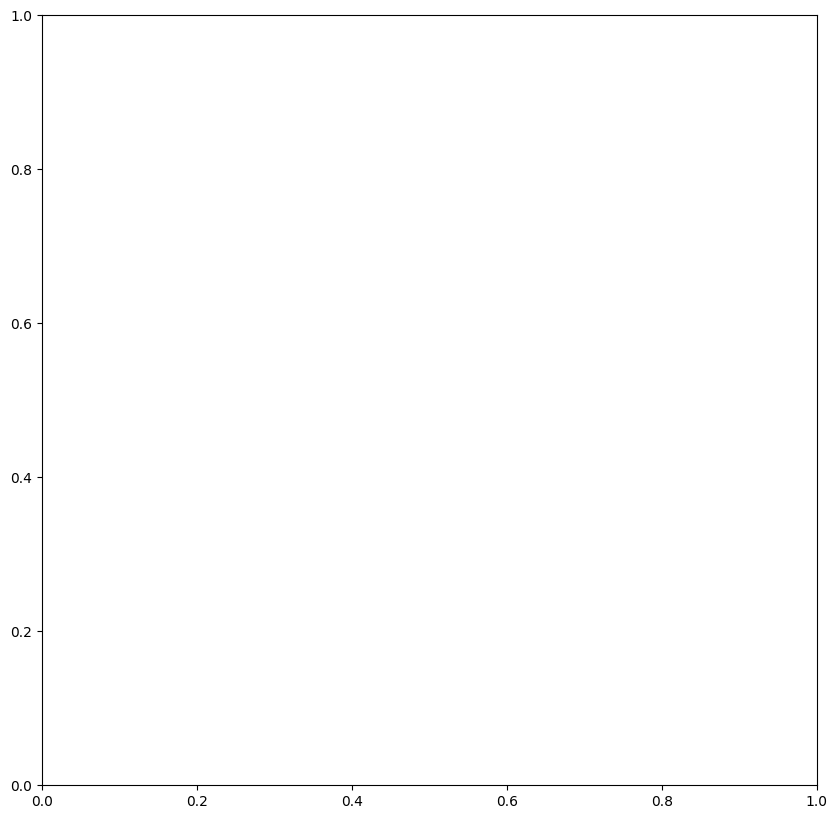

In [82]:
fig, ax = plt.subplots(figsize=(10, 10))

layout = g.layout("fr")

ig.plot(0,
    g,
    target=ax,
    vertex_size=5,
    vertex_color="lightblue",
    edge_color="gray",
    edge_width=0.2,
    layout=layout
)

ax.set_title('Cadeia Alimentar', fontsize=16)
plt.show()